## Example of explicit modeling of scalar wave equation for marmousi model ##

Uses absorbing boundaries: reynolds and dumping - left, right and bottom.



### Getting marmousi p velocity model from Madagascar Seismic ###

get data from */madagascar/src/book/gallery/marmousi/model* <br>
and run the following SConstruct script to create the `marmvel.rsf` <br>

> from rsf.proj import *
   
>Flow('marmvel','marmvel.hh',
'''
    dd form=native | <br>
    scale rscale=.001 | put d1=0.004 d2=0.004 <br>
    label1=Depth label2=Distance unit1=km unit2=km <br>
    label=Velocity unit=km/s
''')


copy the binary file associated to the `marmvel.rsf` to your jupyter-notebook folder <br>
that is the p velocity file used bellow

In [44]:
%cd 
%cd Python

/home/andre
/home/andre/Python


In [45]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(751, 2301)


<matplotlib.colorbar.Colorbar instance at 0x7faf7d39a440>

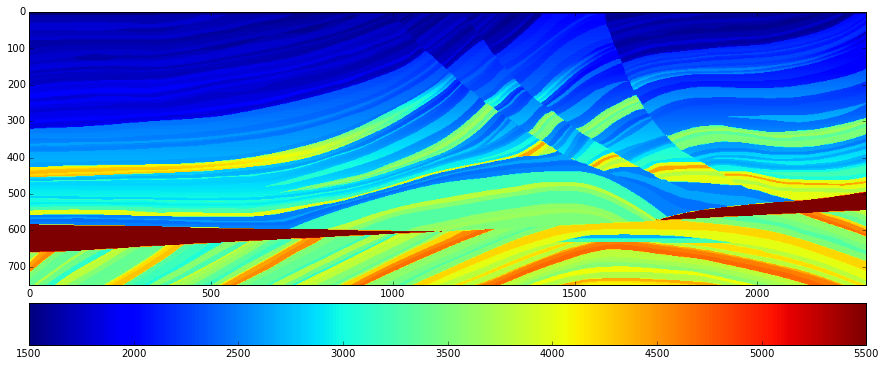

In [49]:
import numpy as np
# size is ~ 6mb
marmvel = np.fromfile('marmvel.rsf@', dtype=np.float32)
marmvel = np.reshape(marmvel, (2301,751))
marmvel = marmvel.transpose()
# Make a wave velocity model from data velocity from marmousi
marmvel = np.round(marmvel*1000) # convert to meters per second and round it
print(marmvel.shape)
figure(figsize(15,8))
imshow(marmvel)
colorbar(orientation='horizontal', pad=0.04)

### make a little smooth (10 gaussian filter) on the p velocity model ###

<matplotlib.colorbar.Colorbar instance at 0x7faf7a1aacf8>

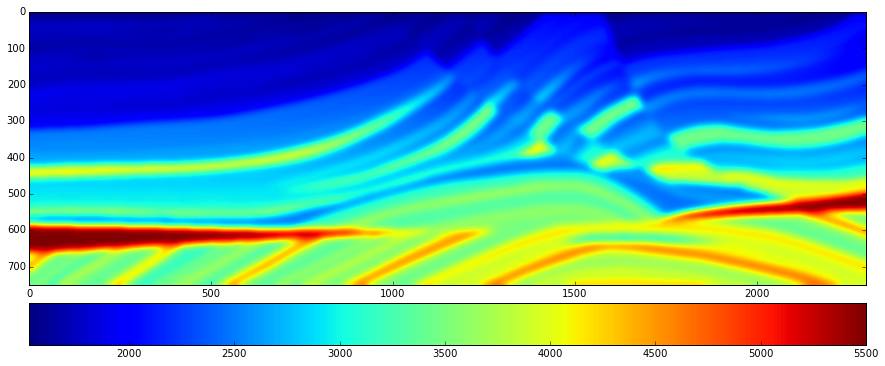

In [50]:
from scipy import ndimage
marmsmooth = ndimage.gaussian_filter(marmvel, 10)
figure(figsize(15,8))
imshow(marmsmooth)
mvel = marmsmooth #awesome index slicing
colorbar(orientation='horizontal', pad=0.04)

### Using the fatiando seismic repository fork and branch `sim-class-migration` ###

In [22]:
cd ~/PycharmProjects/fatiando_seismic/

/home/andre/PycharmProjects/fatiando_seismic


In [23]:
from fatiando.seismic import wavefd

In [6]:
"""
Seismic: 2D finite difference simulation of scalar wave
Marmousi shot example
"""
from fatiando.seismic import wavefd
import numpy as np


# Set the parameters of the finite difference grid
shape = np.shape(mvel)
ds = spacing = 4. # marmousi spacing
area = [0, shape[0] * ds, 0, shape[1] * ds]

fc=45.

simulation = wavefd.Scalar(mvel, (ds, ds))
simulation.add_point_source((1250, 2), -1*wavefd.Gauss(100., fc))
duration = 2.6
maxit = int(duration / simulation.dt)

simulation.run(maxit)

/home/andre/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
|##################################################|100% Ran 5896 iterations in 537.07 seconds.

## Make an animation using some of the time steps ##

In [25]:
%matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Using matplotlib backend: Qt4Agg


In [35]:
ims = []
fig = figure(figsize=(15,8), dpi=200)

for i in range(50):    
    img = imshow(mvel)
    pylab.hold(True)
    img = imshow(simulation[i*100+200], vmin=-25, vmax=25, cmap='gray', alpha=0.7, extent=img.get_extent())
    ims.append([img])
    
ani = animation.ArtistAnimation(fig, ims, interval=100)

#ani.save('marmousi.mp4', dpi=200)

plt.show()

### Embed using magic cell of jupyter ###

In [42]:
%%HTML
<video width="912" height="320" autoplay loop >
  <source src="marmousi.mp4" type="video/mp4">
Your browser does not support the video tag.
</video>